Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
DATA_FOLDER = '.'
import os

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
#item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))
test           = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [3]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
transactions.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [13]:
import matplotlib.pyplot as plt
plt.plot(np.log10(transactions.item_price), '.', markersize=1)
plt.grid(True)
plt.show()


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [6]:
transactions[(transactions.item_price<0).tolist()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [21]:
transactions.iloc[484683-5:484683+5]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484678,07.05.2013,4,32,3187,1249.0,1.0
484679,17.05.2013,4,32,3047,1299.0,1.0
484680,18.05.2013,4,32,3046,799.0,1.0
484681,07.05.2013,4,32,3017,299.0,1.0
484682,23.05.2013,4,32,2973,1249.0,1.0
484683,15.05.2013,4,32,2973,-1.0,1.0
484684,06.05.2013,4,32,2973,2499.0,1.0
484685,02.05.2013,4,32,2972,599.0,1.0
484686,18.05.2013,4,32,2967,399.0,1.0
484687,15.05.2013,4,32,2967,399.5,1.0


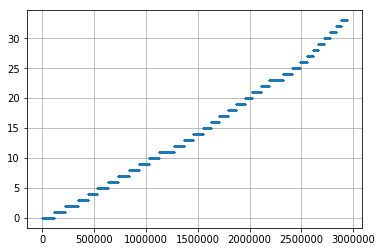

In [151]:
plt.plot(transactions.date_block_num, '.', markersize=.1)
plt.grid(True)
plt.show()

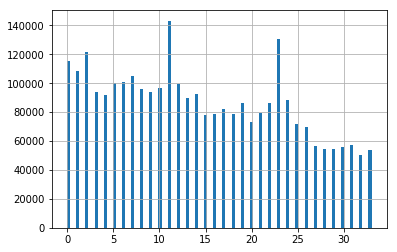

In [42]:
transactions.date_block_num.hist(bins=100)

In [39]:
s = transactions.date_block_num.value_counts().sort_index()

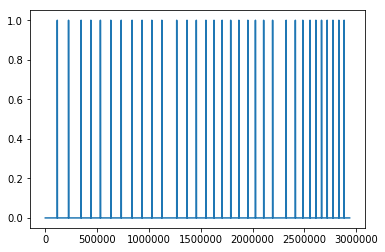

In [46]:
plt.plot(transactions.date_block_num.diff())
plt.show()

In [45]:
pd.to_datetime?

In [4]:
t = pd.to_datetime(transactions.date, format='%d.%m.%Y')

In [5]:
s = [(i - t.iloc[0]).days for i in t]

KeyboardInterrupt: 

In [6]:
def f(d):
    return d.days

#s = (np.array(t.tolist()) - t.iloc[0]).apply(f)
#s = (t - t.iloc[0]).apply(f)
transactions['days'] = s

In [7]:
transactions['date_c'] = t

In [2]:
def save_object(obj, fname):
    import pickle
    pickle.dump(obj, open(fname, 'w'))

def load_object(fname):
    import pickle
    return pickle.load(open(fname, 'r'))


In [6]:
import pickle
#pickle.dump(transactions, open('transactions.pkl', 'w'))
transactions = pickle.load(open('transactions.pkl', 'r'))

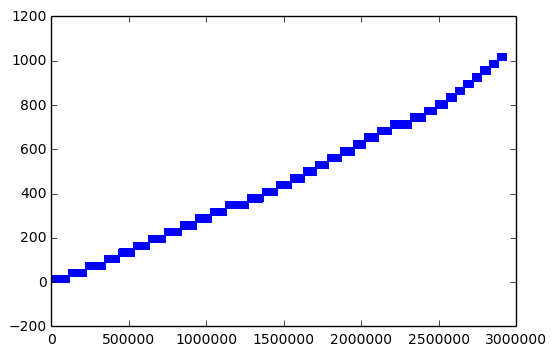

In [8]:
%matplotlib inline 
plt.plot(transactions.days, '.', markersize=1)
plt.show()

In [9]:
pair_count = test.groupby(['shop_id', 'item_id']).count()
np.unique(pair_count)

array([1])

In [144]:
sample_submission = pd.read_csv('sample_submission.csv.gz')

In [9]:
transactions.head(15)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,days,date_c
0,02.01.2013,0,59,22154,999.00,1.0,0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,1,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,3,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,4,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,13,2013-01-15
5,10.01.2013,0,25,2564,349.00,1.0,8,2013-01-10
6,02.01.2013,0,25,2565,549.00,1.0,0,2013-01-02
7,04.01.2013,0,25,2572,239.00,1.0,2,2013-01-04
8,11.01.2013,0,25,2572,299.00,1.0,9,2013-01-11
9,03.01.2013,0,25,2573,299.00,3.0,1,2013-01-03


In [34]:
transactions.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,days
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.562393e+02
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,2.868995e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.110000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.260000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,7.020000e+02
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.032000e+03


In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
#transactions['date_block'] = transactions.date_c.apply(lambda d:(d.year - 2013)*12 + d.month - 1)
#transactions.drop(['date_block'], axis=1, inplace=True)

In [19]:
#trans_test_join = pd.merge(test, transactions, on=['shop_id', 'item_id'], how='left')
#trans_test_join = trans_test_join.fillna(0)
#trans_test_join.head()
#trans_test_join_gb = trans_test_join.groupby(['shop_id', 'item_id'])

In [23]:
df = pd.DataFrame({'c': range(10, 16), 'a': [1, 1, 2, 2, 3, 3], 'b': range(6)}, columns=list('cab'))
df

,c,a,b
0,10,1,0
1,11,1,1
2,12,2,2
3,13,2,3
4,14,3,4
5,15,3,5


In [24]:
def f(x):
    print(x)
    return x.mean(axis=0)

df.groupby('a').apply(f)


    c  a  b
0  10  1  0
1  11  1  1
    c  a  b
0  10  1  0
1  11  1  1
    c  a  b
2  12  2  2
3  13  2  3
    c  a  b
4  14  3  4
5  15  3  5


,c,a,b
a,,,
1,10.5,1.0,0.5
2,12.5,2.0,2.5
3,14.5,3.0,4.5


In [22]:
test.shape

(214200, 3)

In [4]:
cols = ['shop_id', 'item_id', 'date_block_num', 'item_price', 'item_cnt_day']

In [6]:
trans = transactions[cols]
trans.head()

,shop_id,item_id,date_block_num,item_price,item_cnt_day
0,59,22154,0,999.00,1.0
1,25,2552,0,899.00,1.0
2,25,2552,0,899.00,-1.0
3,25,2554,0,1709.05,1.0
4,25,2555,0,1099.00,1.0


In [7]:
trans_gb_shop_item_date = trans.groupby(['shop_id', 'item_id', 'date_block_num'], as_index=False).agg({'item_cnt_day':np.sum})
trans_gb_shop_item_date.head()

,shop_id,item_id,date_block_num,item_cnt_day
0,0,30,1,31.0
1,0,31,1,11.0
2,0,32,0,6.0
3,0,32,1,10.0
4,0,33,0,3.0


In [9]:
from itertools import product
df = pd.DataFrame(
        list(product(np.unique(transactions.shop_id), np.unique(transactions.item_id))), 
        columns=['shop_id', 'item_id'])
df['date_block_num'] = 0

trans_gb_shop_item_dates = df
for month in range(0, 34):
    #print(month)
    trans_gb_shop_item_date_copy = trans_gb_shop_item_date.copy()
    trans_gb_shop_item_date_copy['date_block_num'] -= month
    trans_gb_shop_item_dates = pd.merge(trans_gb_shop_item_dates, trans_gb_shop_item_date_copy, 
         on=['shop_id', 'item_id', 'date_block_num'], how='left')
    trans_gb_shop_item_dates.rename(columns={'item_cnt_day':'item_cnt_day_%d' % month}, inplace=True)

In [80]:
import pickle
#save_object(trans_gb_shop_item_dates, 'trans_gb_shop_item_dates.pkl')
trans_gb_shop_item_dates = load_object('trans_gb_shop_item_dates.pkl')


In [4]:
trans_gb_shop_item_dates.head()

,shop_id,item_id,date_block_num,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
trans_gb_shop_item_dates_fna = trans_gb_shop_item_dates.fillna(0)

In [117]:
trans_gb_shop_item_dates.groupby(['shop_id']).apply(lambda d: np.mean(d.isnull()))

,shop_id,item_id,date_block_num,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
shop_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.890631,0.888293,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.0,0.0,0.0,0.929610,0.919888,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.0,0.0,0.0,0.966616,0.985142,0.980373,0.981566,0.983216,0.978677,0.977668,...,0.977897,0.975191,0.980603,0.980878,0.981245,0.978539,0.978539,0.976063,0.979089,0.979823
3,0.0,0.0,0.0,0.975054,0.974825,0.973449,0.978126,0.978631,0.977714,0.978401,...,0.973632,0.977438,0.977943,0.981336,0.979043,0.980006,0.983354,0.981566,0.983446,0.982070
4,0.0,0.0,0.0,0.951300,0.951850,0.952446,0.989957,0.966708,0.963681,0.961801,...,0.969551,0.972990,0.972486,0.976338,0.976475,0.976154,0.973907,0.973449,0.978447,0.978080
5,0.0,0.0,0.0,1.000000,0.971752,0.965286,0.969734,0.966937,0.964140,0.964278,...,0.964048,0.969597,0.968909,0.975512,0.973770,0.973632,0.971752,0.965516,0.971569,0.971798
6,0.0,0.0,0.0,0.914477,0.915486,0.913652,0.926904,0.927730,0.920393,0.919200,...,0.943734,0.944513,0.950658,0.959967,0.960563,0.958224,0.958454,0.957674,0.959784,0.956253
7,0.0,0.0,0.0,0.941716,0.943000,0.947723,0.956757,0.955427,0.950933,0.947448,...,0.957674,0.957582,0.962856,0.968175,0.971018,0.967809,0.966158,0.966249,0.969184,0.970560
8,0.0,0.0,0.0,0.954785,0.963177,0.969047,0.999954,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
trans_gb_shop_item_dates.isnull()

,shop_id,item_id,date_block_num,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [97]:
#np.clip(pd.merge(test, trans_gb_shop_item_dates_fna, on=['shop_id', 'item_id'], how='left').fillna(0).item_cnt_day_33, 0, 20)

In [110]:
np.unique(trans_gb_shop_item_dates.shop_id)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [108]:
trans_gb_shop_item_dates.head()

,shop_id,item_id,date_block_num,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,item_cnt_day_6,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.linear_model import  LinearRegression


In [100]:
df = trans_gb_shop_item_dates_fna.loc[trans_gb_shop_item_dates_fna.shop_id == 57]
df = trans_gb_shop_item_dates_fna

In [101]:
c = 2
lr = LinearRegression()
lr.fit(df.iloc[:,3:-c], df.iloc[:,-c])
y_pred_train = lr.predict(df.iloc[:, 3:-c])
r2_score(df.iloc[:,-c], y_pred_train)

0.19272818563417182

In [102]:
y_pred_test = lr.predict(df.iloc[:, 4:-(c-1)])
r2_score(df.iloc[:,-(c-1)], y_pred_train)

0.1308403149209918

In [77]:
np.max(y_pred_train)

0.0

In [75]:
df.iloc[:, -(c-1)].describe()

count    21807.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: item_cnt_day_33, dtype: float64

In [55]:
#y_pred_train = np.clip(lr.predict(df.iloc[:, 3:-c]), 0, 20)

In [49]:
from sklearn.metrics import r2_score

1.0

In [7]:
trans_gb_shop_item_dates_fna_test = pd.merge(test, trans_gb_shop_item_dates_fna, how='left', 
                                             on=['shop_id', 'item_id']).fillna(0)

In [8]:
trans_gb_shop_item_dates_fna_test.head()

,ID,shop_id,item_id,date_block_num,item_cnt_day_0,item_cnt_day_1,item_cnt_day_2,item_cnt_day_3,item_cnt_day_4,item_cnt_day_5,...,item_cnt_day_24,item_cnt_day_25,item_cnt_day_26,item_cnt_day_27,item_cnt_day_28,item_cnt_day_29,item_cnt_day_30,item_cnt_day_31,item_cnt_day_32,item_cnt_day_33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#, 'date_block_num'
def f(x):
    dbn = x.groupby(['date_block_num']).agg({'item_cnt_day':np.sum})
    df = pd.DataFrame(index=np.arange(34))
    #print(x, df, dbn)
    df['item_cnt_day'] = dbn['item_cnt_day']
    #df.loc['ID', :] = dbn.ID.iloc[0]
    #df.columns = [None]
    return df.T
trans_gb_shop_item = transactions.iloc[:1000].groupby(['shop_id', 'item_id'])
trans_shop_item_monthly = trans_gb_shop_item.apply(f)

In [105]:
#trans_shop_item_monthly

In [ ]:
import pickle
pickle.dump(transactions, open('trans_shop_item_monthly.pkl', 'w'))
#trans_shop_item_monthly = pickle.load(open('trans_shop_item_monthly.pkl', 'r'))

In [28]:
trans_shop_item_monthly.head()

0    1    2    3   4    5   6   7   8   9  \
shop_id item_id                                                             
2       30      item_cnt_day  NaN  NaN  1.0  NaN NaN  1.0 NaN NaN NaN NaN   
        31      item_cnt_day  NaN  4.0  1.0  1.0 NaN  NaN NaN NaN NaN NaN   
        32      item_cnt_day  NaN  NaN  NaN  NaN NaN  NaN NaN NaN NaN NaN   
        33      item_cnt_day  1.0  NaN  NaN  NaN NaN  NaN NaN NaN NaN NaN   
        38      item_cnt_day  0.0  NaN  NaN  NaN NaN  NaN NaN NaN NaN NaN   

                               ...     45  46  47  48  49  50  51  52  53  \
shop_id item_id                ...                                          
2       30      item_cnt_day   ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
        31      item_cnt_day   ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
        32      item_cnt_day   ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
        33      item_cnt_day   ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
        38      item_cnt_day   ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   

                                   ID  
shop_id item_id                        
2       30      item_cnt_day  22987.0  
        31      item_cnt_day  20994.0  
        32      item_cnt_day  20995.0  
        33      item_cnt_day  22492.0  
        38      item_cnt_day  22491.0  

[5 rows x 55 columns]

## stlf time series estimation using R

In [88]:
from rpy2 import robjects 
robjects.r('''
    library('forecast')
    f <- function(train, horizon) {
        s <- ts(train, frequency=12)
        fc <- stlf(s, 
                     h=horizon, 
                     s.window=3, 
                     method='arima',
                     ic='bic')
        pred <- as.numeric(fc$mean)
        pred
    }

''')

robjects.r('''
    library('forecast')
    
    f1 <- function(x, horizon) {
        s <- ts(x, frequency=12)
        fc <- stlf(s, 
                     h=horizon, 
                     s.window=3, 
                     method='arima',
                     ic='bic')
        pred <- as.numeric(fc$mean)
        pred
    }
    stlf1 <- function(train, horizon) {
        #print(train)
        apply(train, 1, f1, horizon=horizon)
    }

''')

<SignatureTranslatedFunction - Python:0x7faeb71d9248 / R:0xcc738d8>

In [47]:
ro = robjects

In [57]:
x = trans_gb_shop_item_dates_fna_test.iloc[0:10, 4:].values
m = ro.r.matrix(x, nrow=x.shape[0])

In [85]:
trans_gb_shop_item_dates_fna_test.iloc[0:1000].apply(stlf, axis=1)


301
401
501
601
701
801
901
1001
1101
1201


0          [1.70823074408]
1                    [0.0]
2         [0.845566761953]
3          [0.31565179473]
4                    [0.0]
5         [0.250844787041]
6          [1.10201367803]
7          [1.16737528046]
8          [7.50573104331]
9                    [0.0]
10         [3.83584249222]
11        [0.390049384377]
12       [-0.383652198539]
13        [0.545578746371]
14         [4.81599985896]
15         [6.08481375217]
16                   [0.0]
17        [0.607621374161]
18         [1.95348068869]
19       [-0.298384419329]
20       [-0.666318088477]
21                   [0.0]
22         [2.78447266136]
23         [0.77449712056]
24         [2.03626093098]
25                   [0.0]
26                   [0.0]
27       [0.0620122237725]
28         [3.12796603222]
29         [3.44282920872]
              ...         
970                  [0.0]
971       [0.033598402913]
972       [0.043344996438]
973       [0.454157781285]
974        [0.12423475675]
975     [-0.0593531754417]
9

In [109]:

def wrapper(func, *args, **kwargs):
    def wrapped():
         return func(*args, **kwargs)
    return wrapped

In [ ]:
h = 1
i = 0
def stlf(x):
    global i
    i += 1
    if i % 100 == 1:
        print(i)
    #print(x)
    return list(robjects.r['f'](x.tolist()[4:], h))
    

def stlf1(x):
    global i
    i += 1
    if i % 100 == 1:
        print(i)
    #print(x)
    return list(robjects.r['stlf1'](x, h))
    
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

#sales_fc_test = sales_vs_date_gb_store_dept.fillna(0).apply(stlf, axis=1)
#trans_gb_shop_item_dates_fna_test.iloc[0:200].apply(stlf, axis=1)
#trans_gb_shop_item_dates_fna_test.iloc[0:10].apply(stlf1, axis=1)
#stlf1(trans_gb_shop_item_dates_fna_test.iloc[0:10, 4:].values.tolist())
x = trans_gb_shop_item_dates_fna_test.iloc[0:10, 4:].values
m = ro.r.matrix(x, nrow=x.shape[0])
timeit.timeit(wrapper(stlf1, m))


1
101
201
301


In [94]:
import time

In [106]:
import timeit


0.01306295394897461

In [39]:
trans_gb_shop_item_dates_fna_test.shape

(214200, 38)

In [44]:
float(214200)/100 * 2/3600


1.19

In [30]:
trans_shop_item_monthly_fillna = trans_shop_item_monthly.fillna(0).reset_index().sort_values('ID')

In [38]:
trans_shop_item_monthly_fillna.loc[:,['ID',33]].describe()

,ID,33
count,214200.000000,214200.000000
mean,107099.500000,0.293413
std,61834.358168,5.550976
min,0.000000,-1.000000
25%,53549.750000,0.000000
50%,107099.500000,0.000000
75%,160649.250000,0.000000
max,214199.000000,2253.000000


In [51]:
trans_shop_item_monthly_fillna.head()

,shop_id,item_id,level_2,0,1,2,3,4,5,6,...,45,46,47,48,49,50,51,52,53,ID
16495,5,5037,item_cnt_day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16554,5,5320,item_cnt_day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16539,5,5233,item_cnt_day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
16538,5,5232,item_cnt_day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
16545,5,5268,item_cnt_day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [57]:
newcols = ['ID', 'shop_id', 'item_id']
newcols.extend(range(34))
trans_shop_item_monthly_fillna1 = (trans_shop_item_monthly_fillna.loc[:, newcols]
                                   .reset_index()
                                   .drop(['index'], axis = 1)
                                   )

In [63]:
trans_shop_item_monthly_fillna1['ID'] = trans_shop_item_monthly_fillna1['ID'].astype(int)

In [64]:
trans_shop_item_monthly_fillna1.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
trans_shop_item_monthly_fillna_reset = trans_shop_item_monthly_fillna1

In [68]:
#import pickle
#pickle.dump(trans_shop_item_monthly_fillna_reset, open('trans_shop_item_monthly_fillna_reset.pkl', 'w'))

In [70]:
from sklearn.linear_model import Ridge
lr = Ridge?

In [72]:
ridge = Ridge()
X = trans_shop_item_monthly_fillna_reset.loc[:, range(33)].values
y = trans_shop_item_monthly_fillna_reset.loc[:, 33].values


In [73]:
ridge.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
pred_cnt = np.clip(ridge.predict(trans_shop_item_monthly_fillna_reset.loc[:, range(1, 34)].values), 0, 20)

In [87]:
submit = pd.DataFrame([range(len(pred_cnt)), pred_cnt.tolist()]).T

In [94]:
submit.columns = ['ID', 'item_cnt_month']
submit['ID'] = submit['ID'].astype(int) 
submit  = submit.set_index('ID')


In [95]:
submit.to_csv('submit1.csv')

In [ ]:
lr = LinearRegression

In [32]:
trans_shop_item_monthly.index.get_level_values(2)

Index([u'item_cnt_day', u'item_cnt_day', u'item_cnt_day', u'item_cnt_day',
       u'item_cnt_day', u'item_cnt_day', u'item_cnt_day', u'item_cnt_day',
       u'item_cnt_day', u'item_cnt_day',
       ...
       u'item_cnt_day', u'item_cnt_day', u'item_cnt_day', u'item_cnt_day',
       u'item_cnt_day', u'item_cnt_day', u'item_cnt_day', u'item_cnt_day',
       u'item_cnt_day', u'item_cnt_day'],
      dtype='object', length=1000)

In [77]:
df1

,b,c
0,1,2
2,3,4
4,5,6


In [82]:
df[['a', 'b']] = df1

In [92]:
df.iloc[:, [0]] = df1

In [83]:
df

,0,a,b
0,0.0,1.0,2.0
1,0.0,NaN,NaN
2,0.0,3.0,4.0


In [86]:
df

,0,a,b
0,0.0,NaN,1.0
1,0.0,NaN,NaN
2,0.0,NaN,3.0


In [93]:
df

,0
0,NaN
1,NaN
2,NaN


In [21]:
trans_test_join_cnt.head(20)

ID  item_cnt_day
shop_id item_id date_block_num                     
2       30      2.0             22987           1.0
                5.0             22987           1.0
                15.0            22987           1.0
                16.0            22987           1.0
        31      1.0             20994           4.0
                2.0             20994           1.0
                3.0             20994           1.0
                16.0            20994           1.0
                33.0            20994           1.0
        32      12.0            20995           1.0
                14.0            20995           1.0
                18.0            20995           1.0
                20.0            20995           2.0
                21.0            20995           2.0
                23.0            20995           2.0
                26.0            20995           1.0
                31.0            20995           1.0
        33      0.0             22492           1.0
                10.0            22492           2.0
                11.0            22492           1.0

In [20]:
transactions.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
days              0
dtype: int64

In [264]:
transactions['date_p'] = pd.to_datetime(transactions.date, dayfirst=True)
#transactions.date.apply(lambda d: datetime.datetime.strptime(d, '%d.%m.%Y'))

In [65]:
trans_gb_shop_item = transactions.groupby(['shop_id', 'item_id', 'date_c'])

In [123]:
#f = trans_gb_shop_item.agg({'item_price':np.mean, 'item_cnt_day':np.sum, 'days': {'days1':np.mean, 'days2':lambda x:x.iloc[0]}})

In [66]:
trans_shop_item_date = trans_gb_shop_item.agg({'item_price':np.mean, 'item_cnt_day':np.sum, 'days':np.mean })

In [74]:
#trans_shop_item_date['date_c']=trans_shop_item_date.index.get_level_values('date_c')

In [67]:
trans_shop_item_count = (pd.DataFrame(trans_shop_item_date.reset_index().groupby(['shop_id', 'item_id']).date_c.count())
                         .rename(columns={'date_c':'count'}))

In [68]:
train_test_join_shop_item = trans_shop_item_count.join(test.set_index(['shop_id', 'item_id']), how='outer')

In [69]:
(train_test_join_shop_item['count'].isnull() & train_test_join_shop_item['ID'].isnull()).sum()

0

In [70]:
(~train_test_join_shop_item['count'].isnull() & train_test_join_shop_item['ID'].isnull()).sum()

312720

In [71]:
(train_test_join_shop_item['count'].isnull() & ~train_test_join_shop_item['ID'].isnull()).sum()

102796

In [72]:
(~train_test_join_shop_item['count'].isnull() & ~train_test_join_shop_item['ID'].isnull()).sum()

111404

In [73]:
train_test_join_shop_item.shape

(526920, 2)

In [152]:
np.min(transactions.date_c), np.max(transactions.date_c)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-10-31 00:00:00'))

In [87]:
transactions.date_c.head().values[0]

numpy.datetime64('2013-01-02T00:00:00.000000000')

In [92]:
transactions['month'] = [d.month for d in transactions.date_c]

In [11]:
oct_first = pd.datetime(2015, 10, 1)

In [12]:
nov_first = pd.datetime(2015, 11, 1)

In [13]:
transactions_oct = transactions[(transactions.date_c >= oct_first) & (transactions.date_c < nov_first) ]

In [14]:
transactions_oct.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_c,days
2882335,23.10.2015,33,45,13315,649.0,1.0,2015-10-23,1024
2882336,05.10.2015,33,45,13880,229.0,1.0,2015-10-05,1006
2882337,02.10.2015,33,45,13881,659.0,1.0,2015-10-02,1003
2882338,12.10.2015,33,45,13881,659.0,1.0,2015-10-12,1013
2882339,04.10.2015,33,45,13923,169.0,1.0,2015-10-04,1005


In [15]:
trans_test_merge = pd.merge(transactions_oct, test, on=['shop_id', 'item_id'], how='right')

In [16]:
pd.read_csv('sample_submission.csv.gz').head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [17]:
trans_test_merge_1 = trans_test_merge[['ID', 'shop_id', 'item_id', 'item_cnt_day']]

In [118]:
trans_test_merge_1.item_cnt_day = trans_test_merge_1.item_cnt_day.fillna(0)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
pd.DataFrame().to_csv

In [166]:

trans_test_merge_2 = (
trans_test_merge_1.groupby(['shop_id', 'item_id'])
.agg({'ID': (lambda x:x.iloc[0]), 'item_cnt_day':np.sum})
.rename(columns={'item_cnt_day':'item_cnt_month'})
.sort_values(['ID'])
)

In [170]:
trans_test_merge_2.item_cnt_month = trans_test_merge_2.item_cnt_month.clip(0, 20)

In [172]:
trans_test_merge_2.to_csv('submit.csv', index=False)
 

In [227]:
df = pd.DataFrame(np.array([[1, 2, 3],
               ['a', 'b', 'c']]).T, columns=['A', 'B'])

In [188]:
s = pd.Series([4, 4, 4], index=[1, 2, 7])
s

1    4
2    4
7    4
dtype: int64

In [228]:
df

,A,B
0,1,a
1,2,b
2,3,c


In [212]:
df.D = s

In [211]:
df['D'] = s

In [231]:
df.iloc[0,:] = s

In [226]:
s

1    4
2    4
7    4
dtype: int64

In [232]:
df

,A,B
0,NaN,NaN
1,4.0,b
2,4.0,c


# Assignment




Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [261]:
transactions['revenue'] = transactions.item_price * transactions.item_cnt_day
def parse_time(t):
    return [int(i) for i in t.split('.')]
date = transactions.date.apply(parse_time)
date = pd.DataFrame(date.tolist())
date.columns = ['d', 'm', 'y']
transactions_date = pd.concat([transactions, date], axis=1)
transaction_9_14 = transactions_date[(transactions_date.y==2014) & (transactions_date.m==9)]
transaction_9_14.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_p,days,revenue,d,m,y
1953691,24.09.2014,20,5,1039,899.0,1.0,2014-09-24,630,899.0,24,9,2014
1953692,27.09.2014,20,5,1015,449.0,1.0,2014-09-27,633,449.0,27,9,2014
1953693,07.09.2014,20,5,1329,399.0,1.0,2014-09-07,613,399.0,7,9,2014
1953694,27.09.2014,20,5,984,399.0,1.0,2014-09-27,633,399.0,27,9,2014
1953695,08.09.2014,20,5,984,399.0,1.0,2014-09-08,614,399.0,8,9,2014


In [262]:
gb = transaction_9_14.groupby('shop_id')
np.max(gb.revenue.agg(np.sum))

7982852.1999999564

In [29]:
# YOUR CODE GOES HERE

max_revenue = np.max(gb.revenue.agg(np.sum)) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


In [55]:
transaction_summer_14 = transactions_date[(transactions_date.y==2014) & (transactions_date.m>=6) & (transactions_date.m<9)]

In [56]:
transaction_summer_14.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,d,m,y
1705909,15.06.2014,17,26,9532,399.00,1.0,399.00,15,6,2014
1705910,10.06.2014,17,26,9507,149.00,1.0,149.00,10,6,2014
1705911,13.06.2014,17,26,9509,246.32,1.0,246.32,13,6,2014
1705912,03.06.2014,17,26,9532,399.00,1.0,399.00,3,6,2014
1705913,08.06.2014,17,26,9532,399.00,1.0,399.00,8,6,2014


In [38]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [57]:
transaction_cat_summer_14 = pd.merge(transaction_summer_14, items, how='inner', on='item_id')

In [58]:
trans_cat_summer_14_gb = transaction_cat_summer_14.groupby('item_category_id')

In [62]:
trans_cat_summer_14_gb.revenue.agg(np.sum).argmax()

20

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [63]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = trans_cat_summer_14_gb.revenue.agg(np.sum).argmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [75]:
transaction_min_max = transactions.groupby('item_id').item_price.agg({'min': np.min, 'max':np.max})

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [78]:
trans_diff = transaction_min_max['max'] - transaction_min_max['min']

In [88]:
np.where((trans_diff < .1) & (trans_diff != 0))

(array([ 1880,  8483,  9026, 10004, 11690, 14958, 17333, 17623, 19569,
        19664, 20489, 20742, 20807]),)

In [91]:
np.sum(trans_diff == 0)

5926

In [92]:
# YOUR CODE GOES HERE

num_items_constant_price = np.sum(trans_diff == 0)# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [97]:
trans_12_14_shop25 = transactions_date[(transactions_date.y==2014) & (transactions_date.m==12) & (transactions_date.shop_id == 25)]

In [106]:
shop25 = trans_12_14_shop25.groupby('d').item_cnt_day.agg(np.sum)

In [111]:
shop25.describe()

count      30.000000
mean      408.566667
std       342.297681
min       143.000000
25%       210.250000
50%       321.500000
75%       432.750000
max      1966.000000
Name: item_cnt_day, dtype: float64

In [119]:
np.var(shop25.tolist(), ddof=1)

117167.70229885059

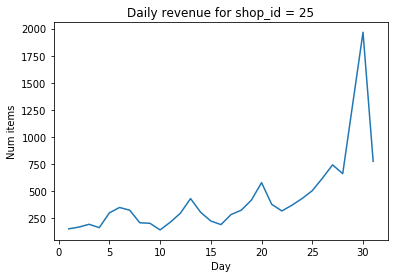

Current answer for task total_num_items_sold_var is: 117167.702299


In [118]:
shop_id = 25

total_num_items_sold = shop25.tolist()# YOUR CODE GOES HERE
days = shop25.index.tolist()# YOUR CODE GOES HERE

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(shop25.tolist(), ddof=1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [95]:
STUDENT_EMAIL = 'amnasri@gmail.com' # EMAIL HERE
STUDENT_TOKEN = 'C4C9hBeriJ9AK9s9'# TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: ----------


In [120]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)